In [229]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model
import yfinance as yf

In [231]:
start='2019-11-14'
end='2023-11-03'
df1=yf.download("AAPL",start,end)
df1

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-14,65.937500,66.220001,65.525002,65.660004,64.052353,89182800
2019-11-15,65.919998,66.445000,65.752502,66.440002,64.813248,100206400
2019-11-18,66.449997,66.857498,66.057503,66.775002,65.140053,86703200
2019-11-19,66.974998,67.000000,66.347504,66.572502,64.942513,76167200
2019-11-20,66.385002,66.519997,65.099998,65.797501,64.186493,106234400
...,...,...,...,...,...,...
2023-10-27,166.910004,168.960007,166.830002,168.220001,168.220001,58499100
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000


In [162]:
df=pd.read_csv("AAPL.csv").tail(1000)
df

,Date,Open,High,Low,Close,Adj Close,Volume
2484,2019-11-14,65.937500,66.220001,65.525002,65.660004,64.052338,89182800
2485,2019-11-15,65.919998,66.445000,65.752502,66.440002,64.813248,100206400
2486,2019-11-18,66.449997,66.857498,66.057503,66.775002,65.140053,86703200
2487,2019-11-19,66.974998,67.000000,66.347504,66.572502,64.942505,76167200
2488,2019-11-20,66.385002,66.519997,65.099998,65.797501,64.186478,106234400
...,...,...,...,...,...,...,...
3479,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
3480,2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000
3481,2023-11-01,171.000000,174.229996,170.119995,173.970001,173.970001,56934900
3482,2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800


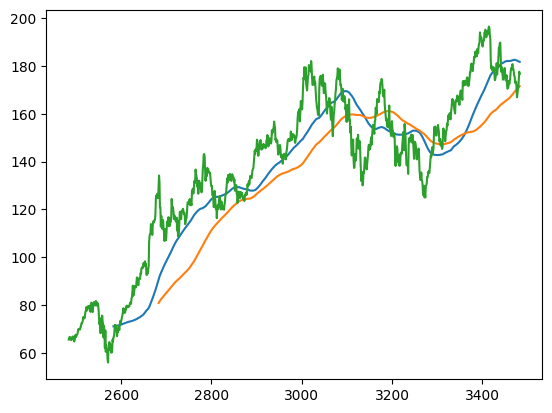

In [163]:
avg100=df.Close.rolling(100).mean()
avg200=df.Close.rolling(200).mean()
closing=df["Close"]
plt.plot(avg100)
plt.plot(avg200)
plt.plot(closing)

In [128]:
data_training,data_testing=np.split(df["Close"],[int(len(df)*0.7)])
print(data_training.shape)
data_testing

(700,)


3184    163.619995
3185    161.380005
3186    158.910004
3187    157.220001
3188    157.960007
           ...    
3479    170.289993
3480    170.770004
3481    173.970001
3482    177.570007
3483    176.649994
Name: Close, Length: 300, dtype: float64

In [129]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))

# Convert the Series to a NumPy array and then reshape
data_training = np.array(data_training).reshape(-1, 1)
data_testing = np.array(data_testing).reshape(-1, 1)

data_training = scaler.fit_transform(data_training)
data_testing = scaler.fit_transform(data_testing)

data_testing

array([[5.40389164e-01],
       [5.09029931e-01],
       [4.74450609e-01],
       [4.50791040e-01],
       [4.61150917e-01],
       [4.31051393e-01],
       [4.13131765e-01],
       [4.33151477e-01],
       [4.12151897e-01],
       [4.52890914e-01],
       [5.37729189e-01],
       [4.03471917e-01],
       [4.24051533e-01],
       [3.82892314e-01],
       [3.59512810e-01],
       [4.12431737e-01],
       [4.46311032e-01],
       [4.01792020e-01],
       [3.88072351e-01],
       [3.55732829e-01],
       [3.60492888e-01],
       [3.74352485e-01],
       [3.47473037e-01],
       [2.44435097e-01],
       [1.84516310e-01],
       [2.44015120e-01],
       [2.95114224e-01],
       [2.99313972e-01],
       [2.85734229e-01],
       [2.10975766e-01],
       [2.15595702e-01],
       [1.95436077e-01],
       [1.86476256e-01],
       [2.51575080e-01],
       [1.87036371e-01],
       [2.43455229e-01],
       [2.62214798e-01],
       [2.63754781e-01],
       [2.57174885e-01],
       [3.11493868e-01],


#### Dividing the data into x_train and y_train

In [130]:
x_train=[]
y_train=[]

for i in range(100,int(data_training.shape[0])):
    x_train.append(data_training[i-100:i]) ## n-100th day to nth day
    y_train.append(data_training[i])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(600, 100, 1)
(600, 1)


#### ML MODEL

In [131]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))  # Remove input_shape here
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))  # Remove input_shape here
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=False))  # Set return_sequences=False for the final LSTM
model.add(Dropout(0.5))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

#fitting data into model
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
19/19 [==============================] - 24s 612ms/step - loss: 0.2206
Epoch 2/50
19/19 [==============================] - 12s 614ms/step - loss: 0.1388
Epoch 3/50
19/19 [==============================] - 15s 785ms/step - loss: 0.0342
Epoch 4/50
19/19 [==============================] - 12s 641ms/step - loss: 0.0237
Epoch 5/50
19/19 [==============================] - 12s 652ms/step - loss: 0.0190
Epoch 6/50
19/19 [==============================] - 13s 662ms/step - loss: 0.0188
Epoch 7/50
19/19 [==============================] - 12s 630ms/step - loss: 0.0173
Epoch 8/50
19/19 [==============================] - 12s 610ms/step - loss: 0.0172
Epoch 9/50
19/19 [==============================] - 12s 614ms/step - loss: 0.0144
Epoch 10/50
19/19 [==============================] - 12s 648ms/step - loss: 0.0156
Epoch 11/50
19/19 [==============================] - 12s 621ms/step - loss: 0.0151
Epoch 12/50
19/19 [==============================] - 14s 744ms/step - loss: 0.0150
Epoch 13/50
1

In [132]:
model.save("keras_stockmodel.h5")

c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Testing the Model

In [133]:
past100days = data_training[-100:]  # Select the last 100 days from data_training
final_testing_data = np.concatenate((past100days, data_testing), axis=0)
type(final_testing_data)

numpy.ndarray

In [134]:
input_data = final_testing_data.reshape(-1, 1)
input_data = scaler.fit_transform(input_data)
 
# Splitting the data into x_test and Y_test
x_test = []
y_test = []

for i in range(100, int(input_data.shape[0])):
    x_test.append(input_data[i-100:i])  # n-100th day to nth day
    y_test.append(input_data[i])

x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(300, 100, 1)
(300, 1)


In [135]:
y_predict=model.predict(x_test)

scale_factor=1/scaler.scale_

y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

print(y_predict.shape)
print(y_predict)


10/10 [==============================] - 5s 249ms/step
(300, 1)
[[0.91030467]
 [0.90654767]
 [0.89697075]
 [0.88086689]
 [0.85867512]
 [0.83165908]
 [0.80133319]
 [0.76912856]
 [0.73645043]
 [0.70442355]
 [0.6739217 ]
 [0.64563191]
 [0.61993003]
 [0.59696513]
 [0.57669401]
 [0.55896837]
 [0.5436058 ]
 [0.5304172 ]
 [0.5191896 ]
 [0.50969183]
 [0.50166655]
 [0.49487641]
 [0.48912358]
 [0.48422959]
 [0.47999796]
 [0.47625133]
 [0.47288302]
 [0.46980792]
 [0.4668884 ]
 [0.46392807]
 [0.460733  ]
 [0.45706049]
 [0.45266384]
 [0.44740728]
 [0.44129035]
 [0.43437529]
 [0.42680034]
 [0.41875008]
 [0.41043493]
 [0.40207371]
 [0.39393109]
 [0.38631386]
 [0.37959093]
 [0.37404323]
 [0.36972141]
 [0.36686248]
 [0.36569726]
 [0.36623955]
 [0.36824143]
 [0.371281  ]
 [0.37488407]
 [0.37856919]
 [0.38186485]
 [0.38435441]
 [0.38586989]
 [0.38645187]
 [0.38624376]
 [0.38547865]
 [0.38441753]
 [0.38338238]
 [0.38272378]
 [0.3826794 ]
 [0.38347417]
 [0.38520551]
 [0.38782185]
 [0.39110947]
 [0.39477155

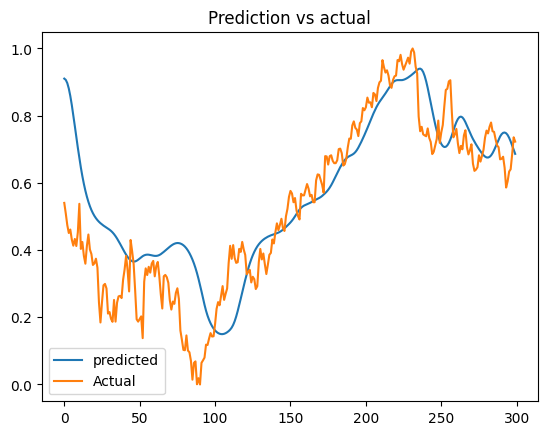

In [137]:
plt.plot(y_predict)
plt.plot(y_test)
plt.title("Prediction vs actual")
plt.legend(["predicted","Actual"])

(152, 100, 1)


5/5 [==============================] - 2s 342ms/step
(152, 1)
(252, 1)


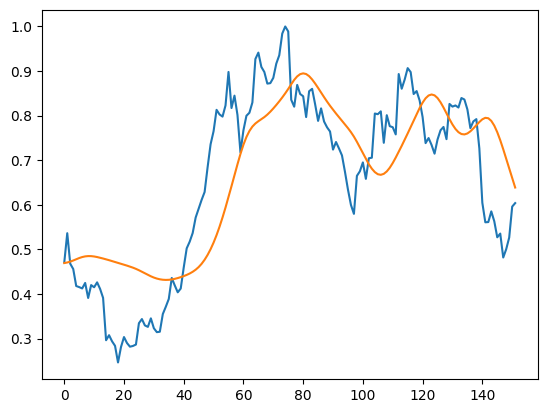

In [196]:
dft=pd.read_csv("TSLA.csv")
col=np.array(dft["Close"])

col = col.reshape(-1, 1)
col = scaler.fit_transform(col)
 
# Splitting the data into x_test and Y_test
inp = []

for i in range(100, int(len(col))):
    inp.append(col[i-100:i])  # n-100th day to nth day

inp=np.array(inp)
print(inp.shape)

op=model.predict(inp)



plt.plot(col[100:])
plt.plot(op*scale_factor)
print(op.shape)
print(col.shape)

(100,)
1/1 [==============================] - 0s 115ms/step


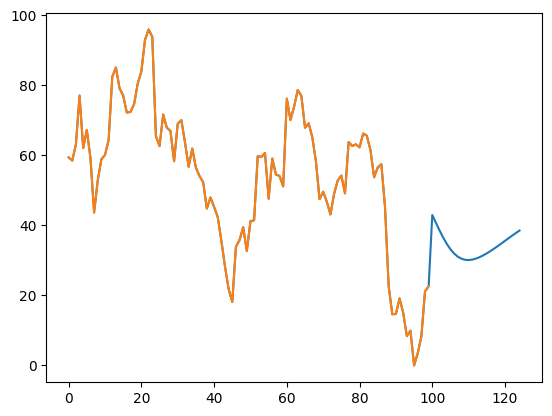

In [232]:
dft=pd.read_csv("TSLA.csv")
col=np.array(dft["Close"])[-100:]
print(col.shape)
col = col.reshape(-1, 1)
col = scaler.fit_transform(col)
 
inp=col
inp=inp.reshape(1,100,1)

op=[]
for p in range(25):
    val=model.predict(inp);
    op.append(val)
    inp = np.concatenate((inp, val.reshape(1, 1, 1)), axis=1)
    inp = inp[:, 1:, :]
    
op=np.array(op)
finval=np.concatenate((col.reshape(100,1,1),op)).ravel()
finval.shape
scale_factor=1/scaler.scale_
plt.plot(finval*scale_factor)
plt.plot(col*scale_factor)

[*********************100%%**********************]  1 of 1 completed
(100,)
1/1 [==============================] - 0s 106ms/step


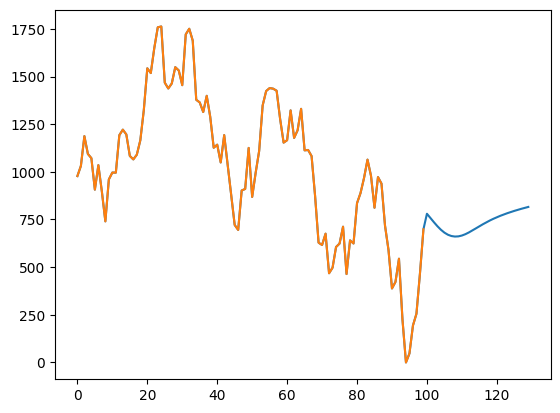

In [239]:
start='2019-11-14'
end='2023-11-03'
df1=yf.download("^IXIC",start,end)
col=np.array(df1["Close"])[-100:]
print(col.shape)
col = col.reshape(-1, 1)
col = scaler.fit_transform(col)
 
inp=col
inp=inp.reshape(1,100,1)

op=[]
for p in range(30):
    val=model.predict(inp);
    op.append(val)
    inp = np.concatenate((inp, val.reshape(1, 1, 1)), axis=1)
    inp = inp[:, 1:, :]
    
op=np.array(op)
finval=np.concatenate((col.reshape(100,1,1),op)).ravel()
finval.shape
scale_factor=1/scaler.scale_
plt.plot(finval*scale_factor)
plt.plot(col*scale_factor)

In [251]:
start='2019-11-14'
end='2023-11-03'
df1=yf.download("^IXIC",start,end)
def pred():
    col = np.array(df1["Close"])[-100:]
    col = col.reshape(-1, 1)
    col = scaler.fit_transform(col)

    inp = col
    inp = inp.reshape(1, 100, 1)

    op = []
    for p in range(30):
        val = model.predict(inp)
        op.append(val)
        inp = np.concatenate((inp, val.reshape(1, 1, 1)), axis=1)
        inp = inp[:, 1:, :]

    op = np.array(op)
    finval = np.concatenate((col.reshape(100, 1, 1), op), axis=0).ravel()
    print(finval.shape)
    scale_factor = 1 / scaler.scale_
    plt.plot(finval * scale_factor)
    plt.plot(col * scale_factor)
    plt.title("Next 30 days")
    plt.legend(["Next 30", "Values so far"])

    
def acc_sf():
    col=np.array(df1["Close"])
    col = col.reshape(-1, 1)
    col = scaler.fit_transform(col)
    scale_factor=1/scaler.scale_
    # Splitting the data into x_test and Y_test
    inp = []

    for i in range(100, int(len(col))):
        inp.append(col[i-100:i])  # n-100th day to nth day

    inp=np.array(inp)
    print(inp.shape)

    op=model.predict(inp)


    plt.plot(col[100:]*scale_factor)
    plt.plot(op*scale_factor)
    plt.title("ACCURACY SO FAR")
    plt.legend(["predicted","Actual"])
    

[*********************100%%**********************]  1 of 1 completed


(899, 100, 1)
29/29 [==============================] - 10s 328ms/step


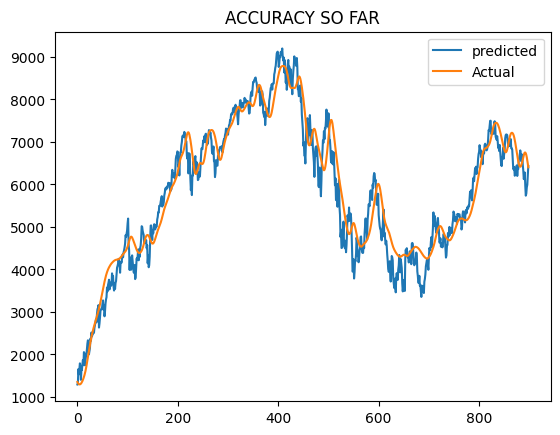

In [250]:
acc_sf()

1/1 [==============================] - 0s 89ms/step
(130,)


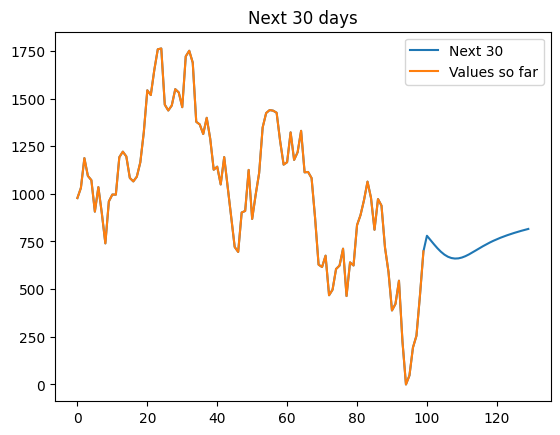

In [252]:
pred()

### Training model for Financial websites


In [253]:
dff=yf.download("BTC-USD",start,end)
data_training,data_testing=np.split(dff["Close"],[int(len(df)*0.7)])

[*********************100%%**********************]  1 of 1 completed


c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
